### Yadhnika Wakde
#### Practical 5
#### CV Lab
#### Batch A1 - 14

##### Any medical image, first do thresholding. It will convert any image into binary format, that is, in two colors, black and white



##### cv2 will analyse the longest contour, maximum surface area. It's coordinates are noted

In [17]:
import cv2
import numpy
import matplotlib.pyplot as plt


# Loading Image
path = r"C:\Users\hp\Downloads\brain.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (400,400))

cv2.imshow("Brain Original", img) # Showing the original image
#cv2.waitKey(0)  # Waits for a key press
#cv2.destroyAllWindows()  

# Applying automatic cropping
_, thresh = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(max(contours, key = cv2.contourArea))
cropped = img[y:y+h, x:x+w]  


cv2.imshow("Brain", cropped)
#cv2.waitKey(0)  # Waits for a key press
#cv2.destroyAllWindows() 

contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (255, 255, 255), 2)

cv2.imshow("Contours of the Brain", contour_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### In this:
#### - We have loaded the image, converted it to grayscale (the original image was already in greyscale)
#### - Applied Binary Thresholding, converted pixels lesser than 10 to 0 and pixels above 10 to 255
#### - Found edges and boundaries of the image
#### - Found the bounding box around the brain
#### - Cropped the brain region
#### - Displayed the cropped Image

In [ ]:

import cv2
import numpy
import matplotlib.pyplot as plt


# Loading Image
path = r"C:\Users\hp\Downloads\brain.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (400,400))

cv2.imshow("Brain Original", img) # Showing the original image
#cv2.waitKey(0)  # Waits for a key press
#cv2.destroyAllWindows()  

# Applying automatic cropping
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(max(contours, key = cv2.contourArea))
cropped = img[y:y+h, x:x+w]  


cv2.imshow("Brain", cropped)
#cv2.waitKey(0)  # Waits for a key press
#cv2.destroyAllWindows() 

contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (255, 255, 255), 2)

cv2.imshow("Contours of the Brain", contour_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


#### In this, we used Otsu's thresholding method  which gives better contours

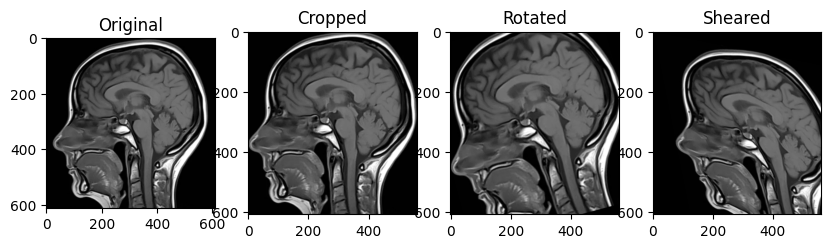

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading Image
path = r"C:\Users\hp\Downloads\brain.jpg"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Applying automatic cropping
_, thresh = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
cropped = img[y:y+h, x:x+w]

# Applying 2D transformations
h, w = cropped.shape
center = (w/2, h/2)

M_rot = cv2.getRotationMatrix2D(center, 15, 1.1)
rotated = cv2.warpAffine(cropped, M_rot, (w, h))

# Shearing
M_shear = np.float32([[1, 0.2, 0], [0.2, 1, 0]])
sheared = cv2.warpAffine(cropped, M_shear, (w, h))

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(1, 4, 2), plt.imshow(cropped, cmap="gray"), plt.title("Cropped")
plt.subplot(1, 4, 3), plt.imshow(rotated, cmap="gray"), plt.title("Rotated")
plt.subplot(1, 4, 4), plt.imshow(sheared, cmap="gray"), plt.title("Sheared")
plt.show()


In [24]:
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(max(contours, key = cv2.contourArea))
cropped = img[y:y+h, x:x+w]  

colored = cv2.applyColorMap(sheared, cv2.COLORMAP_JET)

# Show the colored image
cv2.imshow("Brain Colored", colored)
cv2.waitKey(0)
cv2.destroyAllWindows()